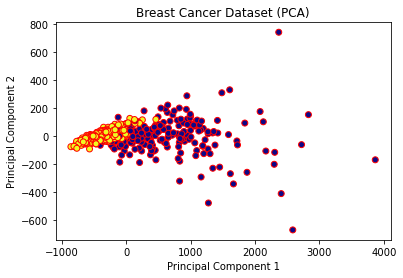

In [1]:
#loading all relevant libraries for data analysis
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

#loading the Brest_cancer_dataset from sklearn
data = load_breast_cancer()
x = data.data
y = data.target
# creating PCA objects 
pca = PCA(n_components=2)

# Fit the PCA model to the data

pca.fit(data.data)

# Transformed data with reduced dimensionality
reduced_data = pca.transform(data.data)

import matplotlib.pyplot as plt

# Project data onto the first 2 principal components
pca_data = reduced_data[:, :2]

#Ploting the data points with labels (0: malignant, 1: benign)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y, cmap="plasma", edgecolors="red")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Breast Cancer Dataset (PCA)")
plt.show()


In [2]:
# splitting the data into train, test module and randomize its state to perform logistic regression 
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [3]:
# Perform PCA (experiment with n_components)
n_components = 2  # defining number of principal components choosen = 2
pca = PCA(n_components= 2)
pca.fit(X_train)

PCA(n_components=2)

In [4]:
# We transform both training (X_train) and testing data (X_test) using the fitted PCA model (pca.transform)
# to reduce their dimensionality.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [5]:
model= LogisticRegression(solver='liblinear')# creating the instance of the model experimenting liblinear 


In [6]:
model.fit(X_train_pca, y_train) # fitting the trained and test features to learn relationship between train and target
# model being created

LogisticRegression(solver='liblinear')

In [7]:
# We then train the model on the transformed training data (X_train_pca) and target labels (y_train)and then 
# using the trained model to make predictions 
y_pred = model.predict(X_test_pca) 

In [8]:
accuracy = accuracy_score(y_test, y_pred)# importing evaluation metrics for accuracy determination of our prediction 
print(f"Accuracy with PCA ({n_components} components): {accuracy:.4f}")# print result in 4 decima places

Accuracy with PCA (2 components): 0.9561


In [9]:
# confusion matrix to show how good the model performs
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

In [10]:
print(confusion_matrix)
# results showing the TP(38) and TN(71) as strong indication of how efficient the model performs while FN(0) and FP(5) are
#very low as expected of a strong model

[[38  5]
 [ 0 71]]
